# World University Rankings 2023 #

## STAT 301 Group Project 

### 1. Introduction

#### Background Information

The World University Rankings Reports (WUR) are annual publications that rank global higher education institutions based on several performance indicators (teaching, research, knowledge transfer and international outlook) and are designed to help students and researchers identify well-performing institutions and make wise education decisions. Quacquarelli Symonds（QS), Times Higher Education (THE) and Shanghai Ranking Consultancy (the Academic Ranking of World Universities; ARWU) are the three longest and most influential global ranking institutions (Wiki, 2024). 

The 2023 World University Rankings dataset is the largest and most diverse ranking dataset. It contains data about 1,799 universities across 104 countries based on an analysis of over 121 million citations across over 15 million research publications and results from over 40,000 survey responses from global scholars.

The dataset includes 13 calibrated performance indicators:
1. University Rank
2. Name of University
3. Location
4. Number of Students
5. Number of Students per Staff
6. Percentage of International Students (%)
7. Female: Male Ratio (%)
8. Overall Score: Comprehensive response variable derived from various indicators
9. Teaching Score: the quality of teaching and campus environment
10. Researching Score: Academic and Employer Reputation
11. Citations Score: Number of times its publications are cited by others
12. Industry Income Score: Institution's ability to attract funds
13. International Outlook Score: Global engagement and diversity Outlook Score

#### Research Questions and Existing Literatures

**How to build a best-fit model using existing datasets to predict future `overall scores` in higher education institutions?**

### 2. Methods and Results

### (a) Exploratory Data Analysis (EDA)

In [37]:
library(tidyverse)
library(repr)
library(broom)
library(GGally)
library(pROC)
library(boot)
library(glmnet)
library(ggplot2)
library(tidyr)

In [21]:
# Main Developer: 
# Contributor:

# part a
# loading and fixing column names
# cleaning and tidy data
university_data <- read_csv("uni_rankings_2023.csv")
colnames(university_data) <- c("university_rank", "name_of_university", "location", "no_of_student", "no_of_student_per_staff", 
                               "international_student", "female_male_ratio", "overall_score", "teaching_score", "research_score",
                               "citations_score","industry_income_score", "international_outlook_score")

university_data_cleaned <- university_data |>
mutate(international_student = as.numeric(gsub("%", "", international_student)) / 100,
      female_male_ratio = as.numeric(sub(":.*", "", female_male_ratio))/as.numeric(sub(".*:", "", female_male_ratio)),
      overall_score = as.numeric(overall_score),
      teaching_score = as.numeric(teaching_score),
      research_score = as.numeric(research_score),
      citations_score = as.numeric(citations_score),
      industry_income_score = as.numeric(industry_income_score),
      international_outlook_score = as.numeric(international_outlook_score)) |>
drop_na()

head(university_data_cleaned)

Rows: 2341 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (11): University Rank, Name of University, Location, International Stude...
dbl  (1): No of student per staff
num  (1): No of student

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“There were 6 warnings in `mutate()`.
The first warning was:
ℹ In argument: `overall_score = as.numeric(overall_score)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 5 remaining warnings.”


university_rank,name_of_university,location,no_of_student,no_of_student_per_staff,international_student,female_male_ratio,overall_score,teaching_score,research_score,citations_score,industry_income_score,international_outlook_score
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,University of Oxford,United Kingdom,20965,10.6,0.42,0.9230769,96.4,92.3,99.7,99.0,74.9,96.2
2,Harvard University,United States,21887,9.6,0.25,1.0000000,95.2,94.8,99.0,99.3,49.5,80.5
3,University of Cambridge,United Kingdom,20185,11.3,0.39,0.8867925,94.8,90.9,99.5,97.0,54.2,95.8
3,Stanford University,United States,16164,7.1,0.24,0.8518519,94.8,94.2,96.7,99.8,65.0,79.8
5,Massachusetts Institute of Technology,United States,11415,8.2,0.33,0.6666667,94.2,90.7,93.6,99.8,90.9,89.3
6,California Institute of Technology,United States,2237,6.2,0.34,0.5873016,94.1,90.9,97.0,97.3,89.8,83.6


#### Histogram

In [33]:
university_data_cleaned_selected <- 
    university_data_cleaned |>
    select(- university_rank, - name_of_university, - location)

In [34]:
university_lm <- lm(overall_score ~ ., data = university_data_cleaned_selected)

university_lm_results <- 
     tidy(university_lm, conf.int = TRUE) %>%
     mutate_if(is.numeric, round, 2)

university_lm_results

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.02,0.03,0.54,0.59,-0.05,0.09
no_of_student,0.00,0.00,-0.38,0.70,0.00,0.00
no_of_student_per_staff,0.00,0.00,-1.17,0.24,0.00,0.00
international_student,0.00,0.04,0.03,0.97,-0.07,0.07
female_male_ratio,-0.02,0.01,-1.82,0.07,-0.04,0.00
teaching_score,0.30,0.00,563.92,0.00,0.30,0.30
research_score,0.30,0.00,650.03,0.00,0.30,0.30
citations_score,0.30,0.00,935.24,0.00,0.30,0.30
industry_income_score,0.02,0.00,135.82,0.00,0.02,0.03


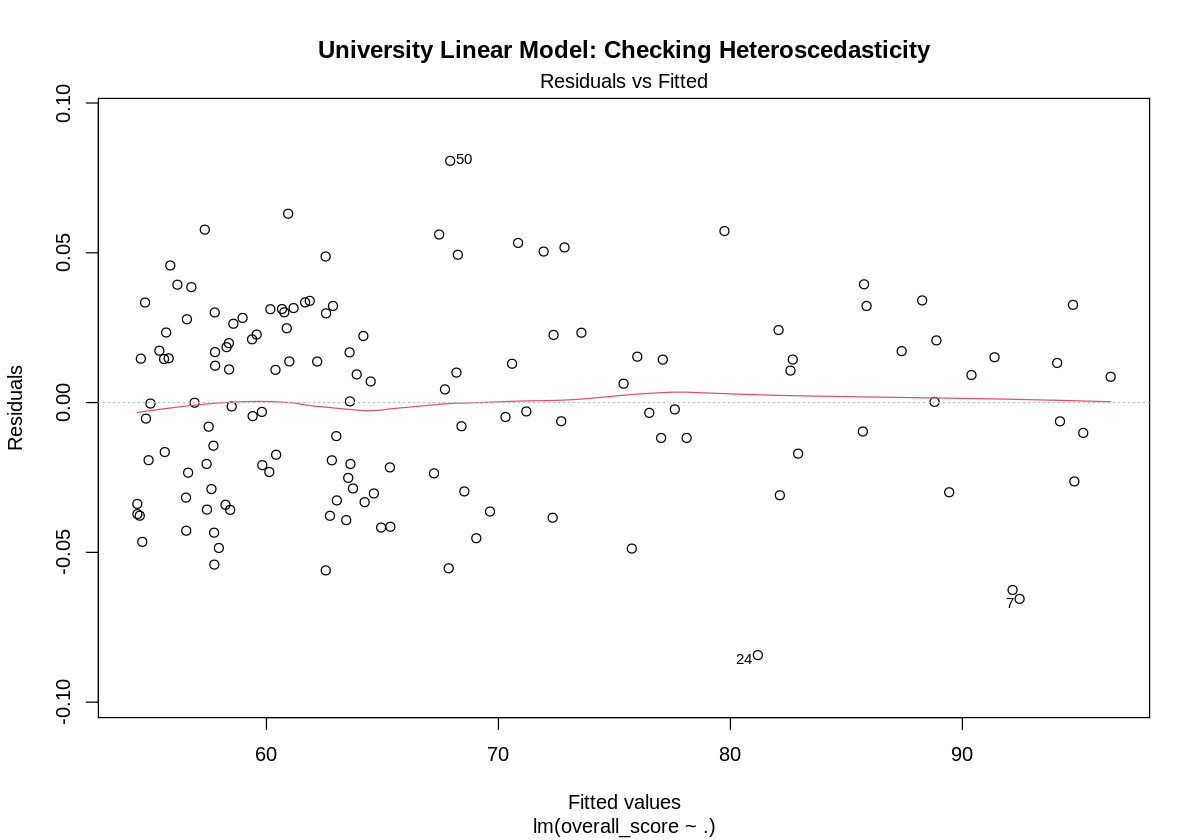

In [39]:
plot(university_lm, 1, main = "University Linear Model: Checking Heteroscedasticity")

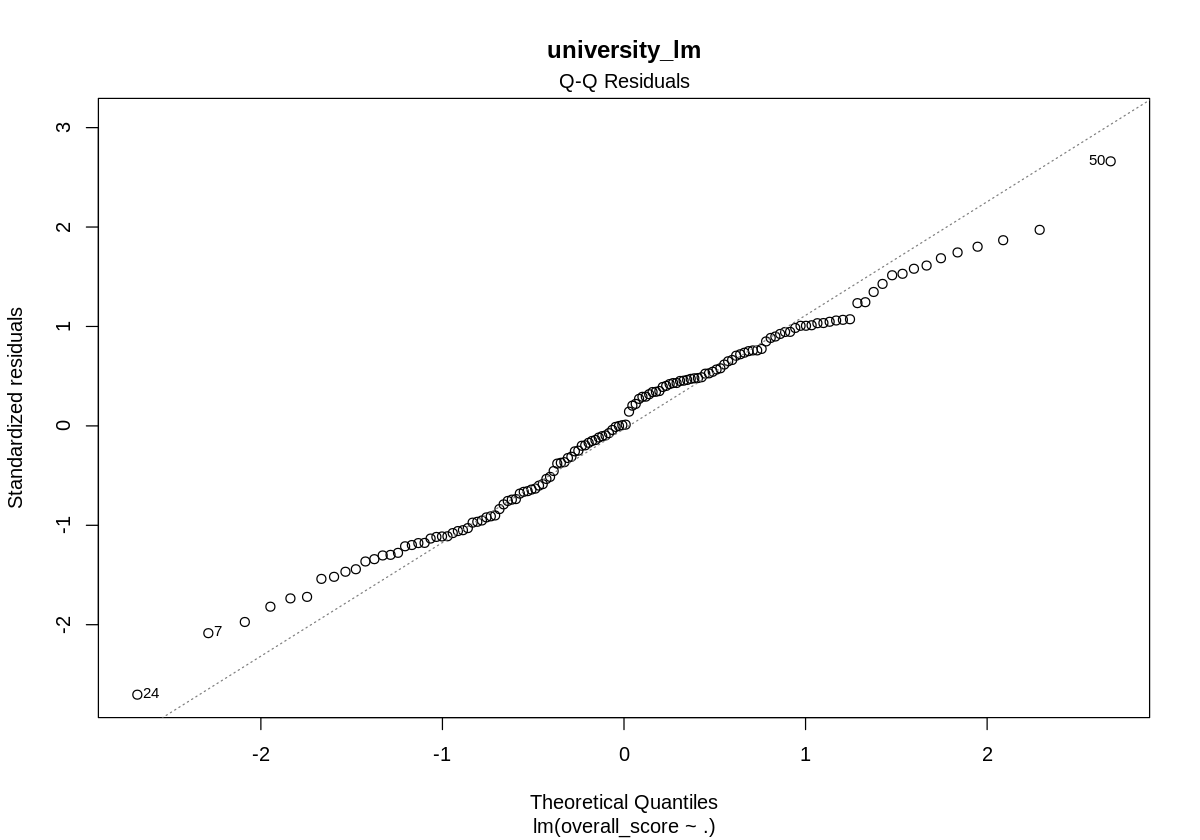

In [35]:
plot(university_lm, 2, main = "university_lm")

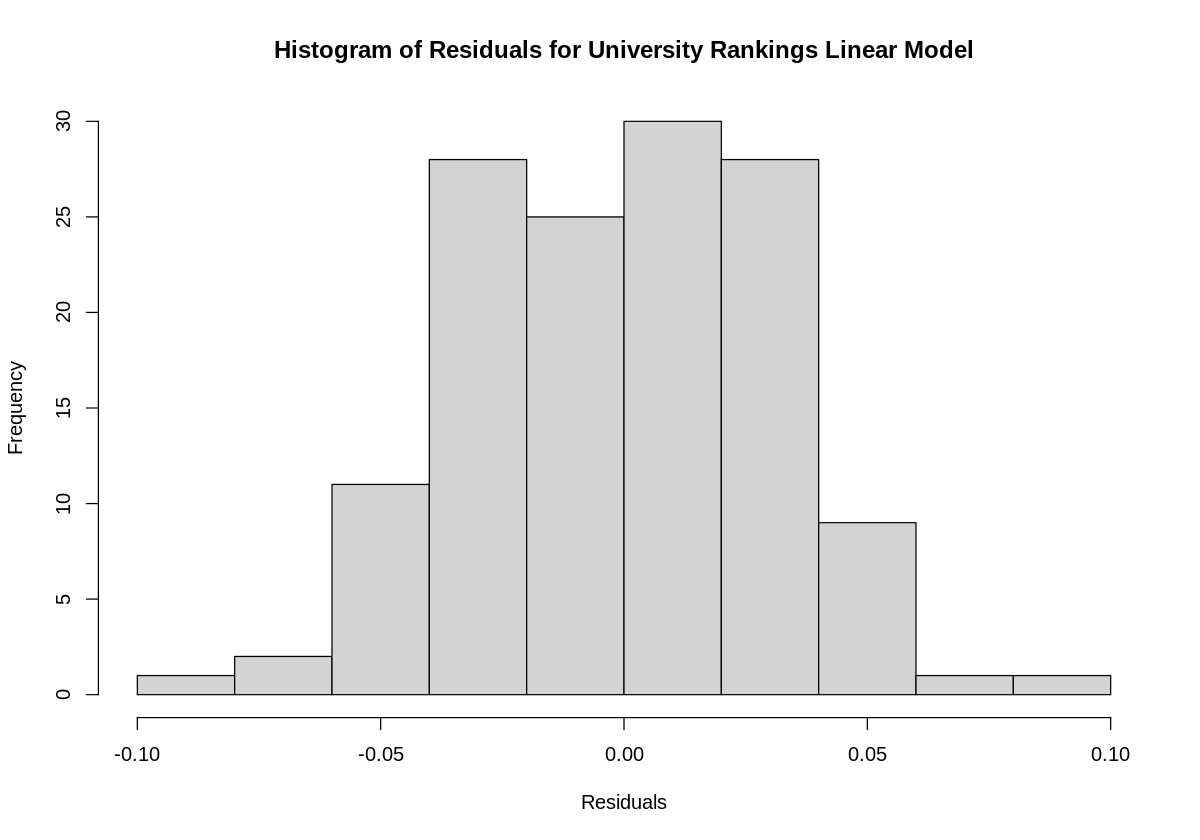

In [36]:
hist(residuals(object = university_lm),
  breaks = 10,
  main = "Histogram of Residuals for University Rankings Linear Model",
  xlab = "Residuals"
)

In [ ]:
variables <- c("no_of_student", "no_of_student_per_staff", "international_student", 
               "female_male_ratio", "overall_score", "teaching_score", 
               "research_score", "citations_score", "industry_income_score", 
               "international_outlook_score")

data_long <- pivot_longer(data, cols = all_of(variables), names_to = "variable", values_to = "value")

ggplot(data_long, aes(x = value, y = variable)) +
  geom_boxplot(fill = "blue", color = "black", alpha = 0.7) +
  theme_minimal() +
  labs(title = "Boxplot for Each Variable", x = "Value", y = "Variable")

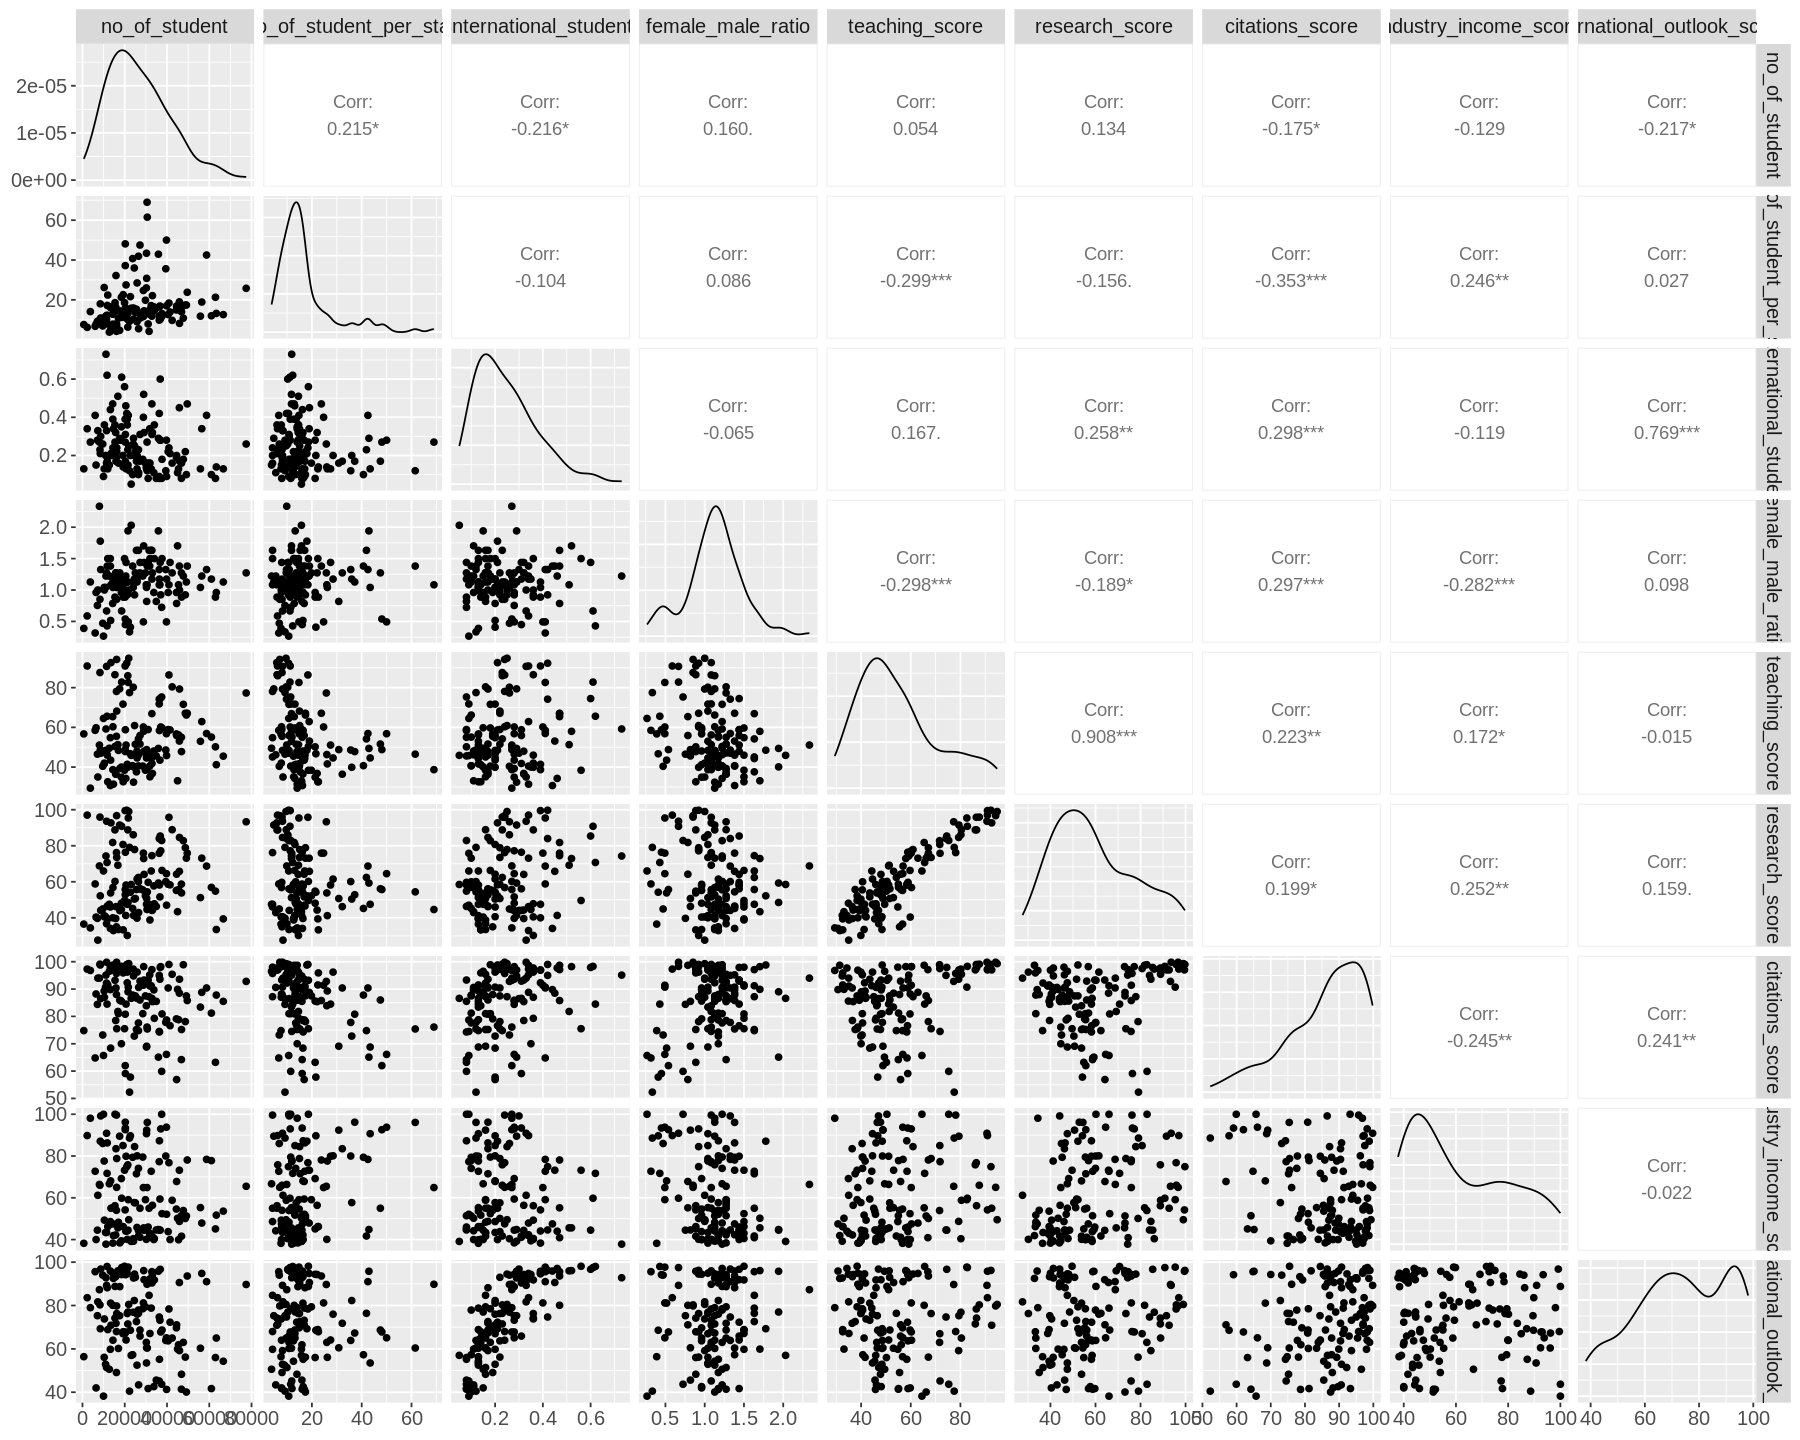

In [17]:
# Main developer: 
# Contributor:

options(repr.plot.width = 15, repr.plot.height = 12) 

university_data_pair_plot <- university_data_cleaned |>
    select(- overall_score, - university_rank, - name_of_university, - location) |>
    ggpairs(progress = FALSE) +
    theme(text = element_text(size = 15))

university_data_pair_plot

In [18]:
corr_matrix_university <- 
    university_data_cleaned |>
    select(- overall_score, - university_rank, - name_of_university, - location) |>
    cor() |>
    as_tibble(rownames = 'var1') %>%
    pivot_longer(-var1, names_to = "var2", values_to = "corr")

head(corr_matrix_university)

var1,var2,corr
<chr>,<chr>,<dbl>
no_of_student,no_of_student,1.00000000
no_of_student,no_of_student_per_staff,0.21538268
no_of_student,international_student,-0.21597424
no_of_student,female_male_ratio,0.15954318
no_of_student,teaching_score,0.05398254
no_of_student,research_score,0.13401133


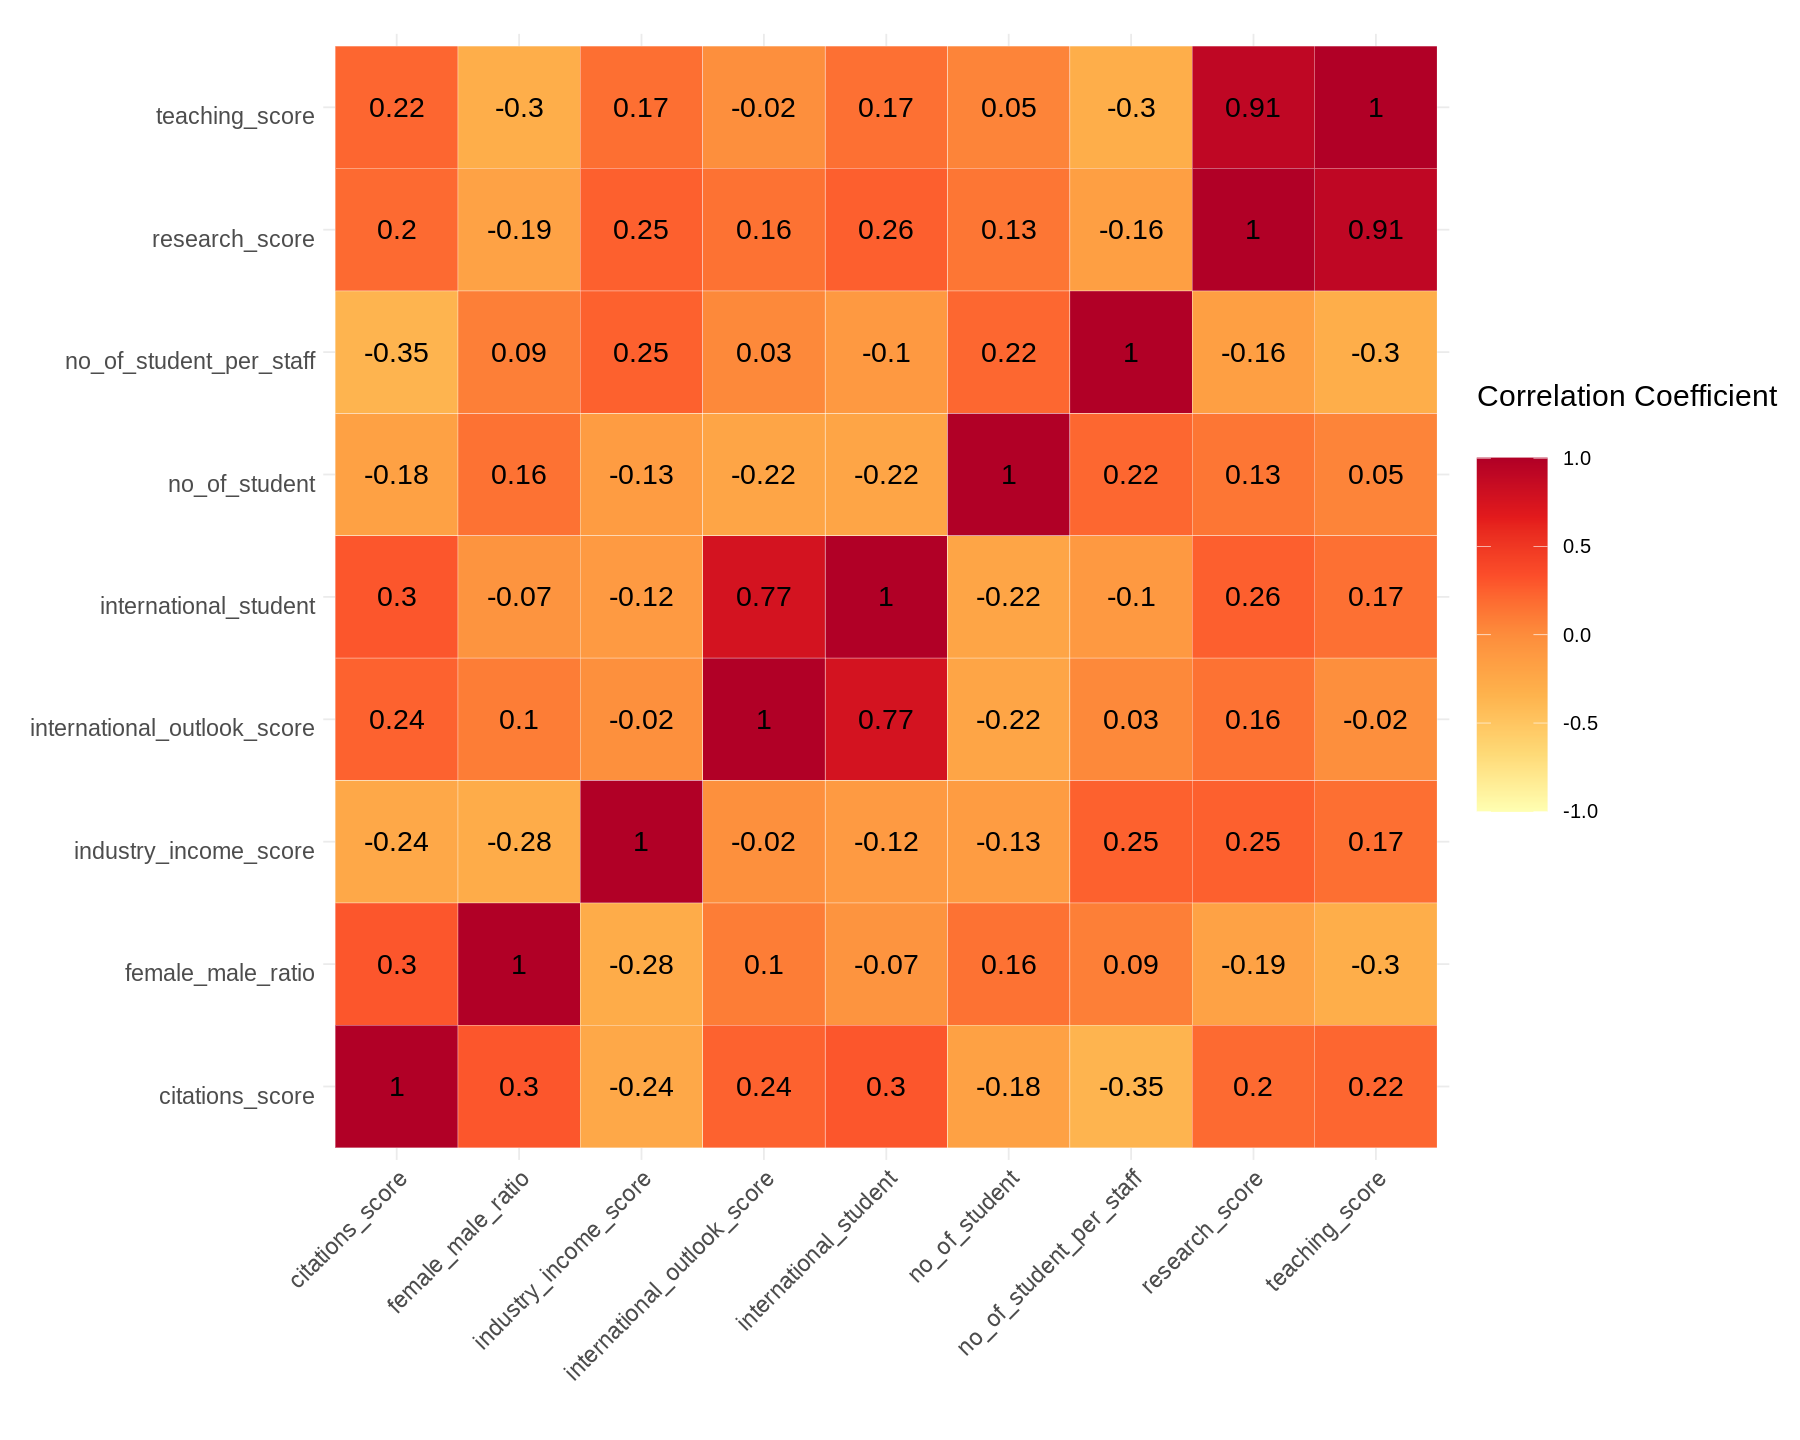

In [19]:
plot_corr_matrix_university <- 
   corr_matrix_university %>%
   ggplot(aes(x = var1, y = var2)) +
   geom_tile(aes(fill = corr), color = "white") +
   scale_fill_distiller("Correlation Coefficient \n",
       palette =  "YlOrRd",
       direction = 1, 
       limits = c(-1,1)
     ) +
     labs(x = "", y = "") +
     theme_minimal() +
     theme(
         axis.text.x = element_text(angle = 45, vjust = 1, size = 14, hjust = 1),
         axis.text.y = element_text(vjust = 1, size = 14, hjust = 1),
         legend.title = element_text(size = 18),
         legend.text = element_text(size = 12),
         legend.key.size = unit(1.5, "cm")
     ) +
     coord_fixed() +
     geom_text(aes(x = var1, y = var2, label = round(corr, 2)), color = "black", size = 6)

plot_corr_matrix_university

### (b) Methods: Plan

### 3. Discussion

### 4. Reference

Wikimedia Foundation. (2024, July 4). College and University Rankings. Wikipedia. https://en.wikipedia.org/wiki/College_and_university_rankings 